# Geoinformática - Práctica 1
## Transformación de los Datos
Las bases de datos provenientes de situaciones reales son problemáticas: se encuentran llenas de "hoyos" (datos ausentes), pueden encontrarse en un sinfín de formatos diferentes y, en muchos casos, la mejor estructura para compartir los datos no es la más óptima para analizarlos, surgiendo así la necesidad de transformarlos.

Es bien sabido que dentro de la Ciencia de Datos, se tenga la componente espacial o no, el trabajo no sólo se enfoca a generar modelos sofisticados o al análisis mismo, sino también a tareas mucho más básicas y menos exóticas como obtener los datos, procesarlos y modificarlos de forma que puedan ser examinados y explorados para entender sus propiedades básicas.

Dado lo extenuantes y relevantes que son estas tareas, es sorprendente encontrar que existen muy pocas publicaciones referentes a los patrones, técnicas y buenas prácticas existentes para una eficiente limpieza, manipulación y transformación de los datos.

Como tal, esta práctica se enfocará en utilizar bases de datos provenientes del mundo real para aprender cómo incorporarlas a Python, de modo que puedan ser transformadas, manipuladas y, de ser necesario, analizadas. Para esto, se repasarán conceptos básicos sobre el análisis científico en Python, ya que posee herramientas fundamentales utilizadas en casi cualquier tarea relacionada con el análisis de datos.

Esta práctica se estudia algunos patrones utilizados en la limpieza y estructuración correcta de los datos, incluyendo procesos como el ordenamiento, la creación de subconjuntos y la agregación, finalizando con algo de visualización básica.

Primero que nada, es necesario importar todas las librerias adicionales que se necesitarán:

In [1]:
#Este comando asegura que las visualizaciones se grafiquen dentro de este Notebook
%matplotlib inline

import os              # Provee de múltiples utilidades del sistema
import pandas as pd    # La librería fundamental para la transformación de datos en Python
import seaborn as sns  # Permite generar gráficas estéticas con sencillez

___
## Conjuto de Datos
En la práctica, se explorarán algunas características de la población de la Ciudad de México. Para esto, se utilizarán los datos del *Censo de Poblacioń y Vivienda 2010* de INEGI, dentro del cual se divide a la población en función de su edad.

Las cuentas se encuentran agregadas a nivel de *Área Geoestadística Básica Urbana* (AGEB Urbana), las cuales, de acuerdo con el INEGI, se definen como un *Área Geográfica ocupada por un conjunto de manzanas perfectamente delimitadas por calles, avenidas, andadores o cualquier otro rasgo de fácil identificación en el terreno y cuyo uso de suelo es principamete habitacional, industrial, de servicios, etc.*. Las AGEB's son la unidad básica del Marco Geoestadístico Nacional, y son lo suficientemente pequeñas para generar significancia estadística dentro de las ciudades, pero lo suficientemente grandes para mantener la privacidad de la población, razón por la que son la referencia de un sinnúmero de datos (Censos, índices, etc.).

Estos datos se encuentran como un archivo *.csv* (*Comma-Separated Values*), y para ser leído se tienen los siguientes comandos:

In [2]:
# Es importante recordar que la ubicación del archivo .csv no siempre será la misma
# Dependiendo de dónde se encuentre almacenado el archivo, será la ruta que se especificará

f = 'data/poblacion_cdmx.csv'                        # Ruta donde se contiene la tabla
db = pd.read_csv(f, index_col='ageb_urbana_cvegeo')  # Leer la tabla y guardarla en la variable db

Resulta pertinente analizar cómo es que el archivo se ha importado; a continuación se presentan los aspectos más importantes de estos comandos:
* Se está recurriendo al método `.read_csv()` de la librería `pandas`, la cual se importó bajo el nombre `pd`
* Este método requiere que se le indique la ubicación del archivo, lo cual se hizo colocando la variable `f` dentro de éste, que a su vez contenía la ruta en forma de cadena de texto `string`. Es posible ver esta ruta llamando a la variable por sí misma:

In [3]:
f

'data/poblacion_cdmx.csv'

* El argumento `index_col` dentro del método no es obligatorio para ejecutarlo; sin embargo, nos permite seleccionar una de las columnas de la tabla para que funcione como su índice. Más adelante se detallará la utilidad de los índices.
* Se utiliza el método `.read_csv()` pues el archivo deseado se encuentra en formato `.csv`; sin embargo, `pandas` permite importar muchos otros formatos, así como exportar en éstos reemplazando la palabra `read` por `to`. Por ejemplo, `.read_csv()` importa, `.to_csv()` exporta. Una lista completa de formatos permitidos se encuentra [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

___
## Fragmentación y Análisis de Datos
Ahora es posible comenzar a jugar con el conjunto de datos. En este momento, se tiene una tabla que contiene, para cada una de las AGEB's en la Ciudad de México, el número de personas que en ella viven, divididas según su edad. Por fortuna, existen múltiples herramientas dentro de `pandas` que ayudan a entender mejor la información contenida en la tabla.
#### Inspeccionar la Apariencia de la Tabla
Es posible analizar los primeros elementos de una tabla a través del método `.head()`:

In [4]:
db.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas
ageb_urbana_cvegeo,,,,,,,,,,
0900200010010,71,77,235,129,137,298,182,1055,293,822
0900200010025,206,241,466,212,261,622,426,1705,699,974
090020001003A,157,137,347,202,197,478,273,1395,370,902
0900200010044,148,162,391,178,203,459,365,1422,469,993
0900200010097,56,82,150,80,88,202,157,626,248,523


De forma equivalente, pueden analizarse los últimos elementos de la tabla a través del método `.tail()`:

In [5]:
db.tail()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas
ageb_urbana_cvegeo,,,,,,,,,,
0901700011488,80,83,133,62,72,185,128,317,134,51
0901700011492,67,52,122,54,59,139,94,271,66,59
0901700011505,89,88,234,151,171,425,223,827,303,146
090170001151A,104,81,209,132,140,334,186,692,279,141
0901700011524,191,211,434,235,233,559,343,1388,419,537


#### Visión General de la Tabla

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2432 entries, 0900200010010 to 0901700011524
Data columns (total 10 columns):
pob_0a2       2432 non-null int64
pob_3a5       2432 non-null int64
pob_6a11      2432 non-null int64
pob_12a14     2432 non-null int64
pob_15a17     2432 non-null int64
pob_18a24     2432 non-null int64
pob_25a29     2432 non-null int64
pob_30a49     2432 non-null int64
pob_50a59     2432 non-null int64
pob_60ymas    2432 non-null int64
dtypes: int64(10)
memory usage: 209.0+ KB


#### Visión General de los *Valores* de la Tabla

In [7]:
db.describe()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas
count,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000
mean,145.943257,159.703125,324.372944,161.321135,174.120888,428.834704,296.325658,1065.569490,368.116365,411.820312
std,112.056808,121.498713,240.267120,115.647911,121.923333,288.072840,201.741121,693.264089,217.976714,250.572492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,67.000000,144.000000,74.000000,82.000000,218.000000,155.000000,578.000000,221.750000,233.750000
50%,119.000000,133.000000,273.000000,138.500000,151.500000,382.500000,263.000000,963.500000,342.000000,392.000000
75%,209.250000,226.250000,461.000000,226.250000,241.000000,580.250000,402.000000,1417.250000,492.500000,562.000000
max,743.000000,746.000000,1586.000000,772.000000,760.000000,2905.000000,3099.000000,8195.000000,1401.000000,1525.000000


Cabe notar que el resultado arrojado es un `DataFrame`, del mismo tipo que la tabla manejada hasta ahora; esto significa que las operaciones que se han podido realizar con la tabla inicial también pueden aplicarse a ésta (e.g. exportarla a un archivo).

En el caso del resultado del método `.describe()`, el resumen podría entenderse más sencillamente si se presenta de forma transpuesta, a través de la instrucción `.T`:

In [8]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
pob_0a2,2432.0,145.943257,112.056808,0.0,61.00,119.0,209.25,743.0
pob_3a5,2432.0,159.703125,121.498713,0.0,67.00,133.0,226.25,746.0
pob_6a11,2432.0,324.372944,240.267120,0.0,144.00,273.0,461.00,1586.0
pob_12a14,2432.0,161.321135,115.647911,0.0,74.00,138.5,226.25,772.0
pob_15a17,2432.0,174.120888,121.923333,0.0,82.00,151.5,241.00,760.0
pob_18a24,2432.0,428.834704,288.072840,0.0,218.00,382.5,580.25,2905.0
pob_25a29,2432.0,296.325658,201.741121,0.0,155.00,263.0,402.00,3099.0
pob_30a49,2432.0,1065.569490,693.264089,0.0,578.00,963.5,1417.25,8195.0
pob_50a59,2432.0,368.116365,217.976714,0.0,221.75,342.0,492.50,1401.0
pob_60ymas,2432.0,411.820312,250.572492,0.0,233.75,392.0,562.00,1525.0


#### Obtención de Estadísticos Descriptivos

In [9]:
# Obtener los valores mínimos de cada columna de la tabla a través de '.min()'
db.min()

pob_0a2       0
pob_3a5       0
pob_6a11      0
pob_12a14     0
pob_15a17     0
pob_18a24     0
pob_25a29     0
pob_30a49     0
pob_50a59     0
pob_60ymas    0
dtype: int64

In [10]:
# Obtener el valor mínimo sólo para una de las columnas de la tabla
db['pob_18a24'].min()

0

Así como un cálculo puede ser restringido a sólo una de las columnas de la tabla, también es posible hacerlo para una de sus filas.

In [11]:
# Identificar una fila en específico a través de '.loc[]'
# Obtener la Desviación Estándar a través de '.std()'
# Se realiza para la fila con el índice '0901200010337', que es la Clave Geográfica del AGEB donde se encuentra CentroGeo.
db.loc['0901200010337', :].std()

387.7159469967098

#### Creación de Nuevas Variables
Es posible generar nuevas variables al aplicar operaciones sobre las ya existentes. Por ejemplo, podría calcularse la población total de cada AGEB a través de múltiples métodos:

In [12]:
# La forma larga implica escribir cada una de las columnas de la tabla
total = db['pob_0a2'] + db['pob_3a5'] + db['pob_6a11'] + db['pob_12a14'] + db['pob_15a17'] + db['pob_18a24'] + \
        db['pob_25a29'] + db['pob_30a49'] + db['pob_50a59'] + db['pob_60ymas']
# Una vez generada la variable, únicamente observamos los primeros registros
total.head()

ageb_urbana_cvegeo
0900200010010    3299
0900200010025    5812
090020001003A    4458
0900200010044    4790
0900200010097    2212
dtype: int64

In [13]:
# La forma corta implica utilizar alguno de los métodos de 'Pandas', como '.sum()'
total = db.sum(axis = 1)
# Y, una vez más, se observa sólamente algunos de los registros de la variable
total.head()

ageb_urbana_cvegeo
0900200010010    3299
0900200010025    5812
090020001003A    4458
0900200010044    4790
0900200010097    2212
dtype: int64

Cabe notar el uso del método `.sum()`, de la misma manera como se utilizó `.min()` en ejemplos anteriores; sin embargo, el cálculo ya no se realiza sobre las columnas sino sobre las filas, lo cual se consigue a través del argumento `axis = 1` dentro del método `.sum()`.

Una vez creada la variable, ésta puede ser añadida como una nueva columna dentro de la tabla original:

In [14]:
db['pob_total'] = total  # Éste es el comando que permite crear la nueva columna
db.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0900200010010,71,77,235,129,137,298,182,1055,293,822,3299
0900200010025,206,241,466,212,261,622,426,1705,699,974,5812
090020001003A,157,137,347,202,197,478,273,1395,370,902,4458
0900200010044,148,162,391,178,203,459,365,1422,469,993,4790
0900200010097,56,82,150,80,88,202,157,626,248,523,2212


#### Asignar Nuevos Valores
De forma similar al ejemplo anterior, es posible generar nuevas columnas llenas únicamente de escalares, y modificarlas.

In [15]:
# Nueva columna llena de sólamente el número 1
db['uno'] = 1
db.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total,uno
ageb_urbana_cvegeo,,,,,,,,,,,,
0900200010010,71,77,235,129,137,298,182,1055,293,822,3299,1
0900200010025,206,241,466,212,261,622,426,1705,699,974,5812,1
090020001003A,157,137,347,202,197,478,273,1395,370,902,4458,1
0900200010044,148,162,391,178,203,459,365,1422,469,993,4790,1
0900200010097,56,82,150,80,88,202,157,626,248,523,2212,1


A través del método `.loc[]`, es posible encontrar celdas específicas de la tabla y modificar su valor.

In [16]:
db.loc['0900200010010', 'uno'] = 3  # Se modifica la columna 'uno' de la fila con el índice '0900200010010'
db.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total,uno
ageb_urbana_cvegeo,,,,,,,,,,,,
0900200010010,71,77,235,129,137,298,182,1055,293,822,3299,3
0900200010025,206,241,466,212,261,622,426,1705,699,974,5812,1
090020001003A,157,137,347,202,197,478,273,1395,370,902,4458,1
0900200010044,148,162,391,178,203,459,365,1422,469,993,4790,1
0900200010097,56,82,150,80,88,202,157,626,248,523,2212,1


#### Eliminar Variables

In [17]:
del db['uno']
db.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0900200010010,71,77,235,129,137,298,182,1055,293,822,3299
0900200010025,206,241,466,212,261,622,426,1705,699,974,5812
090020001003A,157,137,347,202,197,478,273,1395,370,902,4458
0900200010044,148,162,391,178,203,459,365,1422,469,993,4790
0900200010097,56,82,150,80,88,202,157,626,248,523,2212


#### Búsquedas Simples
Los ejemplos anteriores nos permiten entender cómo encontrar subconjuntos de un `DataFrame` si se conoce con exactitud aquellos elementos que se buscan. Por ejemplo, si se quisiera obtener la Población Total y de 18 a 24 años que habita en la AGEB de CentroGeo y sus aledañas, se utiliza el método `.loc()` en conjunto con listas:

In [18]:
pob_18a24_centrogeo = db.loc[['0901200010337', '0901200010341', '0901200010322'],['pob_total','pob_18a24']]
pob_18a24_centrogeo

,pob_total,pob_18a24
ageb_urbana_cvegeo,,
0901200010337,4949,587
0901200010341,2768,298
0901200010322,5009,646


#### Búsqueda Basada en Condiciones
En ocasiones, no se sabe con exactitud cuáles son las observaciones deseadas, pero se sabe las condiciones que deben de satisfacer (e.g. zonas con una población mayor o menor a un parámetro). Un `DataFrame` también permite esta selección basada en condiciones; por ejemplo, supongamos que se quieren seleccionar...

*... áreas con una Población de '60 años o más' mayor a 1,000 personas*

In [19]:
agebs_mucho60ymas = db.loc[db['pob_60ymas'] > 1000, :]
agebs_mucho60ymas.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0900300010107,156,178,426,239,241,679,457,1957,872,1292,6497
0900300010287,245,307,646,301,336,867,612,2468,950,1274,8006
0900300010573,433,542,1146,619,615,1529,955,3958,1199,1030,12026
090030001061A,481,540,1159,548,555,1342,957,3410,885,1103,10980
0900300010639,571,705,1382,668,650,1442,989,3820,903,1209,12339


*... áreas donde no hay más de 10 Infantes de entre 0 y 2 años*

In [20]:
agebs_poco0a2 = db.loc[db['pob_0a2'] < 10, :]
agebs_poco0a2.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0900200011076,0,0,0,0,0,0,0,0,0,0,0
0900300010770,7,6,9,8,9,60,17,75,30,59,280
0900300011533,0,0,0,0,0,0,0,0,0,0,0
0900300011586,8,16,30,18,10,40,35,142,44,91,434
0900500010154,0,1,2,1,1,1,1,1,1,1,10


*... áreas con una Población de entre 25 a 29 años exactamente igual a 50*

In [21]:
agebs_exacto25a29 = db.loc[db['pob_25a29'] == 50, :]
agebs_exacto25a29.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0901000010188,23,20,38,26,32,59,50,185,83,126,642
0901000010258,10,12,46,24,30,75,50,215,92,171,725


**¡Importante** Los criterios de búsquera pueden ser tan sofisticados como sean requeridos; por ejemplo, en el siguiente ejemplo se buscan las AGEB's en donde la Población de 30 a 49 años sean menor a un cuarto de la Población Total:

In [22]:
agebs_cuarto30a49 = db.loc[(db['pob_30a49'] / db['pob_total']) < 0.25, :]
agebs_cuarto30a49.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0900300010111,17,29,93,44,49,125,83,296,174,411,1321
0900300010408,31,21,50,37,47,269,147,361,213,303,1479
090030001054A,15,29,51,25,36,289,157,322,186,208,1318
0900300011730,12,12,30,17,23,71,54,171,100,198,688
0900500010154,0,1,2,1,1,1,1,1,1,1,10


#### Combinación de Condiciones
Todos los criterios pueden ser utilizados entre sí para aumentar la flexibilidad del método. Por ejemplo, puden obtenerse todos los AGEB's que tengan una Población de '60 años o más' mayor a 25 habitantes, pero menor a 250 personas en total; esto se realiza a través del operador `&`:

In [23]:
agebs_critcomb = db.loc[(db['pob_60ymas'] > 25) & (db['pob_total'] < 250), :]
agebs_critcomb

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0901000011203,6,5,18,8,11,10,19,76,37,58,248
0901200010977,12,11,15,6,4,31,21,77,34,33,244
0901400010825,4,3,13,8,10,16,21,74,21,30,200
0901500010254,8,7,15,11,8,18,18,72,39,35,231
0901500010413,8,4,12,6,7,24,18,73,21,45,218
0901500010767,7,5,13,6,5,23,18,80,27,47,231
0901500010818,7,8,16,10,20,23,16,74,23,28,225
0901600010887,5,6,14,7,1,26,11,57,28,48,203
0901600010957,1,3,7,0,3,9,10,29,18,27,107


#### Acomodo de Datos
Entre las múltiples operaciones permitidas para un `DataFrame`, una de las más útiles es la habilidad de ordenar una tabla en función de una de sus columnas; por ejemplo, si se quisieran ordenar las AGEB's en función de su Población Total, en orden descendente:

In [24]:
db_pob_ord = db.sort_values('pob_total', ascending = False)
db_pob_ord.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0900700011994,202,228,451,217,243,2905,3099,8195,1039,536,17115
0900300011162,632,690,1586,748,729,1684,1237,4545,1332,1525,14708
0901000011171,548,611,1237,618,595,1562,1069,4391,1377,1328,13336
0901700010210,743,731,1378,679,751,1795,1013,3602,1267,1375,13334
0900300010802,661,725,1416,718,760,1620,1107,4006,911,1232,13156


Si se analizan con detalle las [características del método](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) `.sort()`, se notará que el argumento `ascending` es el que permite obtener un orden descendente; asímismo, es posible indicar a más de una columna como criterio de orden, lo cual permite un *acomodo jerárquico*, esto es, ordenar un función de una primera columna, después de una segunda y así cuantas sean necesarias.

___
## Exploración Visual de los Datos
El siguiente paso para entender a detalle los datos es tratar de entender cual es su apariencia, visualmente hablando.

La sección anterior nos permitió descubrir e inspeccionar partes específicas de los datos para encontrar casos particulares que puedan resultar de interés; ahora, se graficarán los datos para tener una idea general de la distribución de sus valores, para lo cual se utiliza la librería `seaborn`

#### Histogramas
Una de las herramientas gráficas más sencillas para mostrar la distribución de los valores de una variable es el Histograma; los valores son colocados en grupos de intervalos iguales, y éstos son graficados como barras que se elevan tanto como el conteo de los valores contenidos en el grupo.

Si se quisiera un Histograma que muestre la forma de la Población Total, esto puede conseguirse fácilmente a través del siguiente comando:

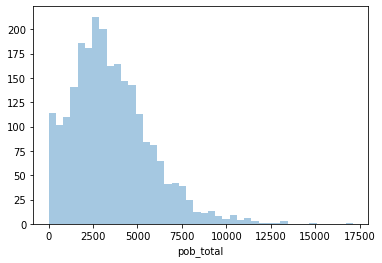

In [25]:
_ = sns.distplot(db['pob_total'], kde = False)

Cabe notar que se está utilizando el prefijo `sns` en lugar de `pd`, pues la función pertenece a la librería `seaborn` en lugar de `pandas`, y esos fueron los nombres que se le asignaron a cada una al ser importadas.

Es posible observar a simple vista que la mayoría de las AGEB's poseen una población de entre 5,000 y 6,000 habitantes, aproximadamente; sin embargo, existen algunas pocas que poseen una cantidad de habitantes mucho más grande, sobrepasando inclusive los 15,000 habitantes

Para identificar este tipo de registros individualmente, la función `.distplot()` [posee un argumento llamado](https://seaborn.pydata.org/generated/seaborn.distplot.html) `rug`, que añade una marca en la ubicación de cada valor individual del eje horizontal:

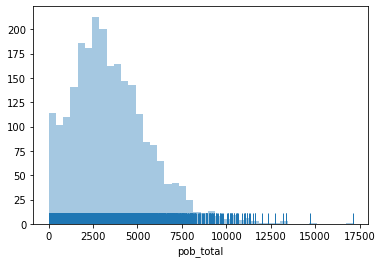

In [26]:
_ = sns.distplot(db['pob_total'], kde = False, rug=True)

#### Gráfica de Densidad de Kernel
Los histogramas son úiles, pero son parcialmente artificiales en el sentido de que una variable contínua es transformada en discreta al convertir todos los valores en grupos discretos. Una alternativa a esto es la Estimación de Densidad de Kernel (KDE, por sus siglas en inglés), lo cual produce una función empírica de densidad:

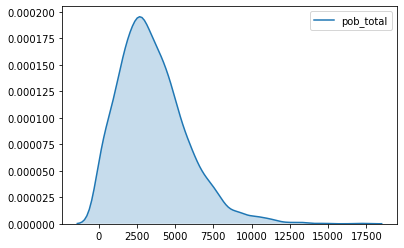

In [27]:
_ = sns.kdeplot(db['pob_total'], shade = True)

#### Gráficos de Líneas y Barras
Otra forma común de visualizar una variable es a través de una Gráfica de Línea o una de Barras. Por ejemplo, si se quisiera generar una Gráfica de Línea de la Población Total, ordenada de forma descendente, se tendría:

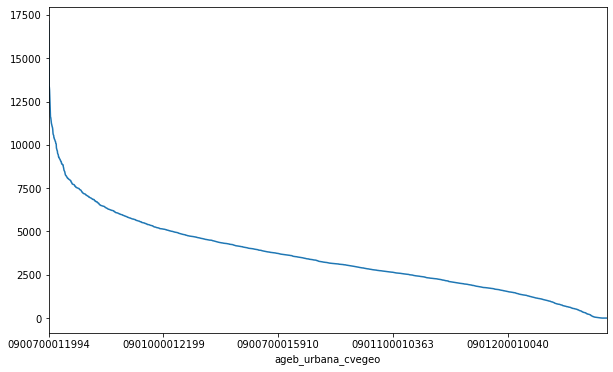

In [28]:
_ = db['pob_total'].sort_values(ascending = False).plot(figsize =(10, 6))

En este caso, se está utilizando la función `.plot()` para generar la gráfica; cabe destacar que [uno de sus argumentos](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html), `figsize`, es utilizado para controlar el tamaño de la gráfica generada, colocando los valores del ancho y el largo en pulgadas.

Para generar la Gráfica de Barras, únicamente es necesario cambiar otro de los argumentos de la función `.plot()`, en este caso el llamado `kind`:

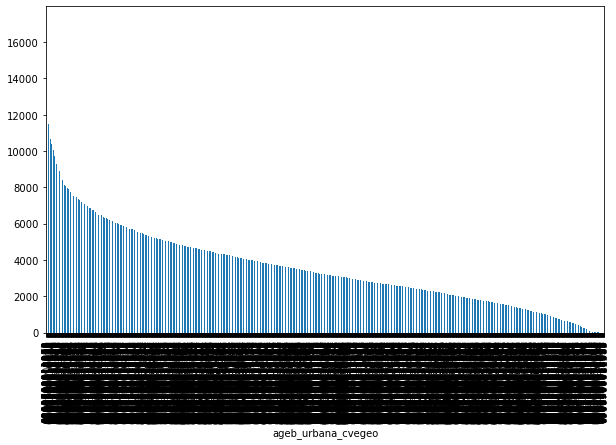

In [29]:
_ = db['pob_total'].sort_values(ascending = False).plot(kind = 'bar' , figsize =(10, 6))

La enorme cantidad de AGEB's del `DataFrame` no sólo ocasiona que la función tarde en ejecutarse, sino también que el Eje Horizontal se vuelva imposible de leer; para esto, no sólo se puede modificar el tamaño de la gráfica, sino también la orientación de las barras, lo cual se logra modificando el valor del argumento `kind`:

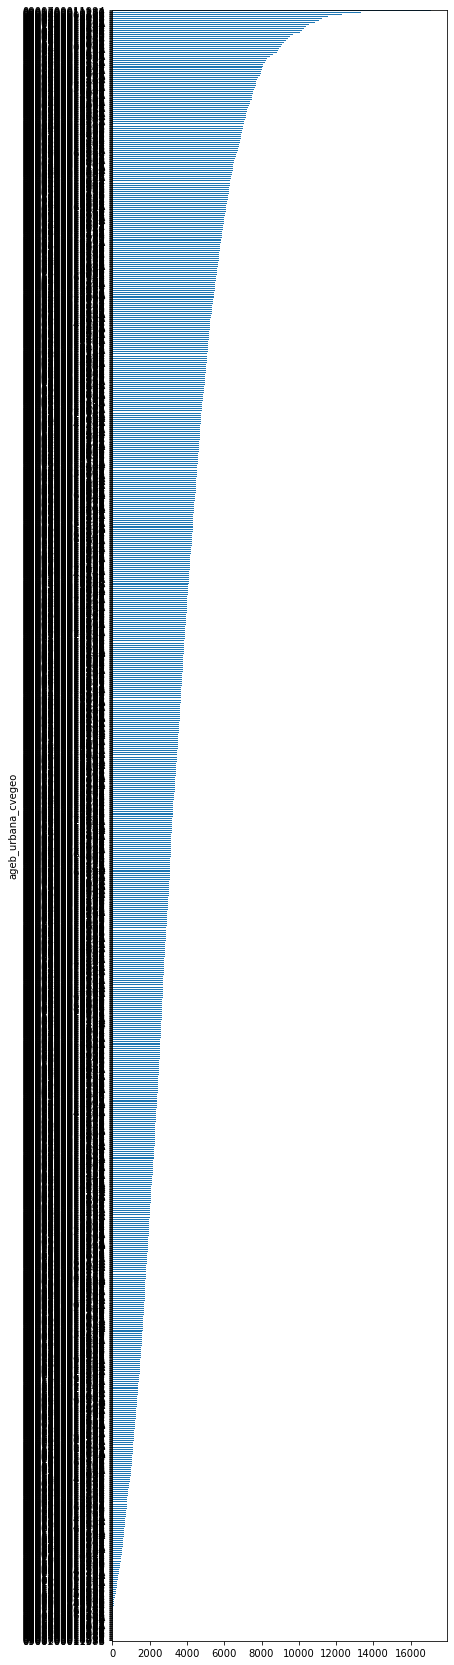

In [30]:
_ = db['pob_total'].sort_values().plot(kind = 'barh' , figsize =(6, 30))

___
## Limpieza de Datos
Una vez importados los datos, habiendo explorado casos particulares y teniendo un primer acercamiento visual al conjunto, el siguiente paso es prepararlo para realizar un análisis más sofisticado, como lo es una Regresión Estadística, una división en subgrupos a partir de características particulares, o simplemente obtener un resumen más detallado de los datos.

Para todos los casos anteriores, lo primero que se necesita es lo que el estadista neozelandés [Hadley Wickham](http://hadley.nz/) define como *Tidy Data*; la idea general de este concepto se centra en convertir los datos de cualquier estructura en la que fueron recibidos a una que permita una manipulación sencilla y estandarizada, y que permita introducirla directamente a una herramienta de análisis con la misma estructuración.

Wickham destaca tres características fundamentales que posee el *Tidy Data*:
1. Cada variable forma una sola columna
2. Cada observación forma una fila
3. Cada tipo de unidad de observación forma una tabla

Para mayor información sobre el concepto de *Tidy Data*, puede consultarse el [Artículo Académico](https://www.jstatsoft.org/article/view/v059i10) original (de Acceso Libre), así como el [Repositorio Púlico](https://github.com/hadley/tidy-data) asociado a él.

Tratemos de aplicar el concepto de *Tidy Data* a los datos de la práctica. Primero, recordando su estructura:

In [31]:
db.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,
0900200010010,71,77,235,129,137,298,182,1055,293,822,3299
0900200010025,206,241,466,212,261,622,426,1705,699,974,5812
090020001003A,157,137,347,202,197,478,273,1395,370,902,4458
0900200010044,148,162,391,178,203,459,365,1422,469,993,4790
0900200010097,56,82,150,80,88,202,157,626,248,523,2212


Podría decirse que esta Base de Datos no cumple con las condiciones del *Tidy Data*; comenzando por la última condición (*Cada tipo de unidad de observación forma una tabla*), este `DataFrame` posee dos unidades de observación: la primera, los AGEB's individuales etiquetados por su *Clave Geográfica* (CVEGEO) representados en el total, y la segunda, los subgrupos de población de cada área.

Para mejorar en este aspecto, pueden crearse dos tablas diferentes:

In [32]:
# Primero, se aisla la variable 'pob_total' en su propia tabla de una sola columna.
db_totales = db[['pob_total']]
db_totales.head()

,pob_total
ageb_urbana_cvegeo,
0900200010010,3299
0900200010025,5812
090020001003A,4458
0900200010044,4790
0900200010097,2212


In [33]:
# Después, se crea la tabla que contiene todas las columnas de la original excepto el 'pob_total'
db_subgrupos = db.drop('pob_total', axis = 1)
db_subgrupos.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas
ageb_urbana_cvegeo,,,,,,,,,,
0900200010010,71,77,235,129,137,298,182,1055,293,822
0900200010025,206,241,466,212,261,622,426,1705,699,974
090020001003A,157,137,347,202,197,478,273,1395,370,902
0900200010044,148,162,391,178,203,459,365,1422,469,993
0900200010097,56,82,150,80,88,202,157,626,248,523


Cabe notar el uso del método `.drop()` para remover la columna 'pob_total', pero también funcionaría utilizar una lista que contenga el nombre de todas las columnas que se mantendrían.

Para este punto, la tabla `db_totales` cumple las condiciones buscadas: cada observación forma una sola fila, cada columna es una variable y sóĺo hay una unidad observacional en la tabla.

Sin embargo, la tabla `db_subgrupos` aún no cumple en su totalidad: aunque ahora sólo existe una unidad de observación en la tabla, cada fila no cumple con ser una sola observación, además de que hay valores de las variables como nombres de las columnas (en otras palabras, no todas las columnas son una variable).

Para alcanzar los objetivos, es necesario reorganizar la tabla de forma que cada fila sea un subgrupo de población en un área, y se muestren las tres variables importantes de nuestro `DataFrame`: Clave del AGEB (CVEGEO), Subgrupo de la Población y el Conteo de la Población (Frecuencia). Debido a que éste es un patrón bastante común de organización de datos, `pandas` ya ofrece un método para obtenerlo:

In [34]:
subgrupos_orden = db_subgrupos.stack()
subgrupos_orden.head()

ageb_urbana_cvegeo           
0900200010010       pob_0a2       71
                    pob_3a5       77
                    pob_6a11     235
                    pob_12a14    129
                    pob_15a17    137
dtype: int64

El método `.stack()` apila las diferentes columnas de una tabla en múltiples filas. Aunque esto permite alcanzar el objetivo buscado, el resultado obtenido no es un objeto del tipo `DataFrame`:

In [35]:
type(subgrupos_orden)

pandas.core.series.Series

Se trata de un objeto del tipo `Series`, que se asemeja a un `DataFrame` pero teniendo una sola columna; la información adicional contenida (CVEGEO y Subgrupo de Población) se encuentra almacenada en forma de múltiples índices. Una de las formas sencillas de transformar un objeto `Series` en `DataFrame` es a través del método `.reset_index()` de `pandas`, que transforma a los índices en columnas separadas:

In [36]:
subgrupos_ordenDF = subgrupos_orden.reset_index()
subgrupos_ordenDF.head()

,ageb_urbana_cvegeo,level_1,0
0,0900200010010,pob_0a2,71
1,0900200010010,pob_3a5,77
2,0900200010010,pob_6a11,235
3,0900200010010,pob_12a14,129
4,0900200010010,pob_15a17,137


Para mejorar la apariencia de ese resultado, se utiliza el método `.rename()`, también de `pandas`, a través de su argumento `columns`:

In [37]:
subgrupos_ordenDF = subgrupos_ordenDF.rename(columns = {'level_1':'Subgrupo', 0:'Frecuencia'})
subgrupos_ordenDF.head()

,ageb_urbana_cvegeo,Subgrupo,Frecuencia
0,0900200010010,pob_0a2,71
1,0900200010010,pob_3a5,77
2,0900200010010,pob_6a11,235
3,0900200010010,pob_12a14,129
4,0900200010010,pob_15a17,137


Con esto, todas las tablas cumplen con las condiciones del *Tidy Data*.
___
## Agrupamiento, Transformación y Agregación
Una de las ventajas del proceso de limpieza anterior es que las tablas resultantes permiten realizar transformaciones avanzadas de forma directa; de las más comunes son las Operaciones de Agrupamiento (*Group-By*), las cuales permiten conjuntar observaciones utilizando sus etiquetas, índices o categorías, así como aplicar operaciones de caracter grupal.

Por ejemplo, si se quisiera sumar el total de la población perteneciente a cada subgrupo de edad, primero se necesita emplear uno de los operadores más populares y utilizados de `pandas`, y razón por la cual ha sido tan popularizado, llamado `.groupby()`:

In [38]:
pop_grupos = subgrupos_ordenDF.groupby('Subgrupo')
pop_grupos

Aunque `pop_grupos` no genera un resultado inmediatamente visible, si almacena la manera en que se realiza la agrupación y, por ende, nos permite realizar una multitud de operaciones, como la suma buscada a través del método `.sum()`:

In [39]:
pop_grupos.sum()

,Frecuencia
Subgrupo,
pob_0a2,354934
pob_12a14,392333
pob_15a17,423462
pob_18a24,1042926
pob_25a29,720664
pob_30a49,2591465
pob_3a5,388398
pob_50a59,895259
pob_60ymas,1001547


Asímismo, puede generarse un resumen de cada subgroup utilizando `.describe()`

In [40]:
pop_grupos.describe()

Frecuencia                                                        \
                count         mean         std  min     25%    50%      75%   
Subgrupo                                                                      
pob_0a2        2432.0   145.943257  112.056808  0.0   61.00  119.0   209.25   
pob_12a14      2432.0   161.321135  115.647911  0.0   74.00  138.5   226.25   
pob_15a17      2432.0   174.120888  121.923333  0.0   82.00  151.5   241.00   
pob_18a24      2432.0   428.834704  288.072840  0.0  218.00  382.5   580.25   
pob_25a29      2432.0   296.325658  201.741121  0.0  155.00  263.0   402.00   
pob_30a49      2432.0  1065.569490  693.264089  0.0  578.00  963.5  1417.25   
pob_3a5        2432.0   159.703125  121.498713  0.0   67.00  133.0   226.25   
pob_50a59      2432.0   368.116365  217.976714  0.0  221.75  342.0   492.50   
pob_60ymas     2432.0   411.820312  250.572492  0.0  233.75  392.0   562.00   
pob_6a11       2432.0   324.372944  240.267120  0.0  144.00  273.0   461.00   

                    
               max  
Subgrupo            
pob_0a2      743.0  
pob_12a14    772.0  
pob_15a17    760.0  
pob_18a24   2905.0  
pob_25a29   3099.0  
pob_30a49   8195.0  
pob_3a5      746.0  
pob_50a59   1401.0  
pob_60ymas  1525.0  
pob_6a11    1586.0

La versatilidad de `.groupby()` permite que sobre los grupos no sólo se puedan aplicar funciones genéricas, como `.sum()` o `.describe()`, sino también funciones generadas por el propio usuario, lo cual permite realizar casi cualquier tipo de transformacioń y agregación.

___
### Para Practicar...
Resulta útil aplicar lo aprendido sobre otro tipo de Conjuntos de Datos. Por ejemplo, la organización *Wikileaks* posee una Base de Datos pública en la cual se contiene, entre otras cosas, el número de casualidades existentes durante los primeros años de la [*Guerra de Afganistán*](https://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism), la cual puede ser consultada a través de la siguiente liga:

> https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1

Desde Python es posible visualizar la apariencia de esta información utilizando los siguientes comandos:

In [41]:
# Importar la librería a utilizar
from IPython.display import IFrame

# Guardar en una variable la URL de la información
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'

# Mostrar como ventana lo que arrojaría la URL
IFrame(url, 700, 400)

Realiza lo siguiente con estos datos:
* Descarga la tabla como un archivo de tipo `.csv` (Archivo --> Descargar como --> .csv, hoja actual)
* Importa los datos a Python
* Explora generando algunas gráficas
* Examina qué tanto se ajusta a los principios del *Tidy Data* y conviértelo de forma que lo haga
* Obten una cuenta total de las casualidades por mes y genera una gráfica con ésta